In [2]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import json
import numpy as np
%matplotlib inline

In [3]:
def read_csv(fname):
    #f = lambda x : json.loads(x.replace("'","\""))
    #df = pd.read_csv(fname, converters={'sensor_type': f}, index_col=0)
    df = pd.read_csv(fname, index_col=0)
    return df

In [4]:
def save_graph(plot, fname='saved.png'):
    fig = plot.get_figure()
    fig.savefig(fname)

In [51]:
keys = {'all': ['ma_window', 'sensor_type', 'n_record', 'n_train', 'ms_interval'],
        'kNN': ['n_neighbors', 'algorithm'],
        'LOF': ['n_neighbors', 'algorithm'],
        'k-means': ['n_clusters', 'max_iter'],
        'NN': ['num_of_hidden_nodes', 'num_of_training_epochs', 'size_of_mini_batch', 'learning_rate'],
       }

def df_values(_df):
    print('--- common')
    for c in keys['all']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[c].unique()))

    print('--- kNN')
    for c in keys['kNN']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='kNN'][c].unique()))
    
    print('--- LOF')
    for c in keys['LOF']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='LOF'][c].unique()))
    
    print('--- k-means')
    for c in keys['k-means']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='k-means'][c].unique()))
    
    print('--- NN')
    for c in keys['NN']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='NN'][c].unique()))

In [59]:
def show_graph(df_list, columns, x_title, y_title):
    df_list = [df[[x_title, y_title]] for df in df_list]
    
    df_list = [df.rename(index=str, columns={y_title: c}) for df, c in zip(df_list, columns)]
    
    merge_df = df_list[0]
    for df in df_list[1:]:
        merge_df = merge_df.merge(df, on=[x_title], how='outer')
    
    v = merge_df[columns].values
    v_max, v_min = np.nanmax(v), np.nanmin(v)
    v_range = v_max - v_min
    
    display(merge_df)
    merge_df.plot.bar(x='n_train', ylim=[v_min - v_range*0.1, v_max + v_range*0.2])

--- common
ma_window                               [1]
sensor_type                             [ '["rssi.a", "rssi.b", ["gyro.rotationRate.x", "gyro.rotationRate.y", "gyro.rotationRate.z"]]']
n_record                                [1]
n_train                                 [  1   5  10  20 100]
ms_interval                             [20]
--- kNN
n_neighbors                             [ 1.  3.  5.  7.  9.]
algorithm                               ['ball_tree']
--- LOF
n_neighbors                             [ 1.  3.  5.  7.  9.]
algorithm                               ['ball_tree']
--- k-means
n_clusters                              [ 1.  3.  5.  7.  9.]
max_iter                                [ 3.]
--- NN
num_of_hidden_nodes                     [  4.   8.  16.  32.]
num_of_training_epochs                  [ 100.]
size_of_mini_batch                      [ 10.]
learning_rate                           [ 0.02]


,n_train,kNN,LOF,k-menas,NN
0,5,0.896713,0.900556,0.900509,0.900880
1,10,0.901852,0.892731,0.902731,0.901806
2,20,0.909444,0.886759,0.907731,0.905231
3,100,0.905324,0.883704,0.903519,0.900972
4,1,NaN,NaN,0.880787,0.882222


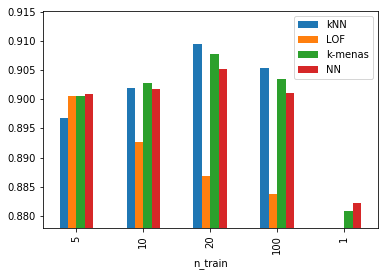

In [60]:
csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv'
#csv_file = 'test_record_02_01_01__^02_01__^02_1[23].csv'
df = read_csv(csv_file)

_d = df[
    (df['n_record'] == 1) & 
    (df['ms_interval'] == 20) &
    (df['sensor_type'].apply(lambda x: 'gyro.rotationRate' in x))
]
df_values(_d)

_d_knn = _d[(_d['type']=='kNN') & (_d['n_neighbors'] == 5)]
_d_nn  = _d[(_d['type']=='NN') & (_d['num_of_hidden_nodes'] == 8)]
_d_lof = _d[(_d['type']=='LOF') & (_d['n_neighbors'] == 5)]
_d_kms = _d[(_d['type']=='k-means') & (_d['n_clusters'] == 1)]

show_graph([_d_knn, _d_lof, _d_kms, _d_nn], ['kNN',  'LOF', 'k-menas', 'NN'], 'n_train', 'auc')